In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('/content/epa-sea-level.csv')
df = df[['Year','CSIRO Adjusted Sea Level']].dropna()
df

,Year,CSIRO Adjusted Sea Level
10,2013,8.913386
11,2012,9.244094
12,2011,8.897638
13,2010,8.834646
14,2009,8.531496
...,...,...
139,1884,0.590551
140,1883,-0.232283
141,1882,-0.440945
142,1881,0.220472


In [3]:
def draw_plot():
  plt.figure(figsize=(12, 6))
  plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Orginal Data', color='blue')

  res1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
  x_pred1 = pd.Series(range(1880, 2051))
  y_pred1 = res1.slope * x_pred1 + res1.intercept
  plt.plot(x_pred1, y_pred1, 'r', label='Best fit line: 1880-2050')

  df_recent = df[df['Year'] >= 2000]
  res2 = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
  x_pred2 = pd.Series(range(2000, 2051))
  y_pred2 = res2.slope * x_pred2 + res2.intercept
  plt.plot(x_pred2, y_pred2, 'green', label='Best fit line: 2000-2050')

  #labels and titles
  plt.xlabel('Year')
  plt.ylabel('Sea Level (inch)')
  plt.title('Rise in Sea Level')
  plt.legend()

  return plt.gcf()

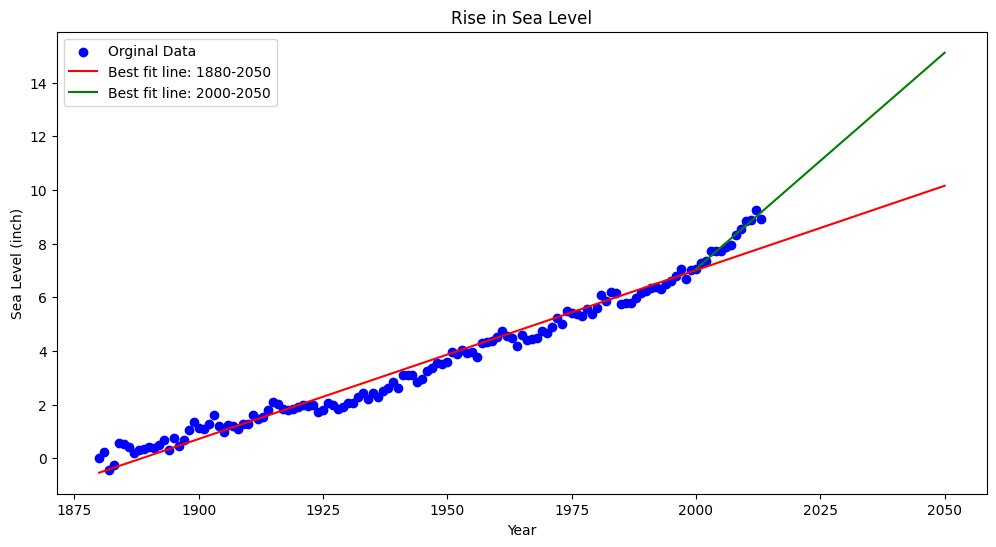

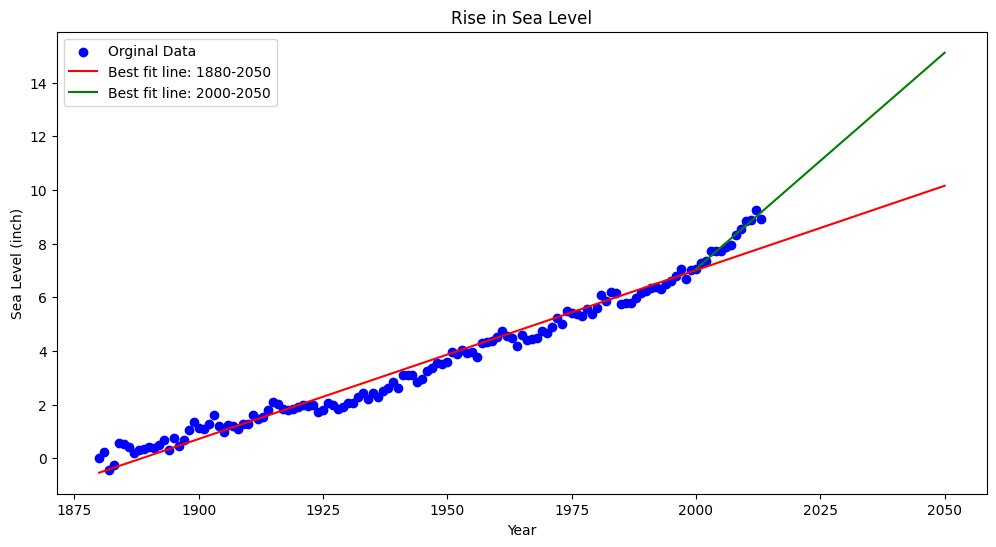

In [4]:
draw_plot()